In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hbl-dummydata/Hbl_dummydata.pdf


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read your dataset (replace 'file.csv' with your actual file path)
# data = pd.read_csv("file.csv") or use Excel reader for Excel files
data = pd.read_csv('/kaggle/input/hbl-dummydataset/Enhanced_Dummy_HBL_Data - Sheet1.csv')
data

,Region,Subregion,Area,Branch,Account Type,Transaction To,Credit,Debit
0,Lahore,Lahore1,Model Town,MT Branch 1,Current,Mezan,9664016.928,0.000
1,Lahore,Lahore3,Model Town,MT Branch 1,Business,Lahore4,0.000,1567209.971
2,Lahore,Lahore4,Model Town,MT Branch 1,Business,Lahore4,1707974.095,0.000
3,Lahore,Lahore1,Model Town,MT Branch 1,Current,Lahore3,0.000,4988621.128
4,Lahore,Lahore3,Model Town,MT Branch 1,Business,MCB,9955056.656,0.000
...,...,...,...,...,...,...,...,...
83,Karachi,Karachi2,North Nazimabad,Nazimabad Branch 2,Current,Karachi3,4546101.122,0.000
84,Karachi,Karachi3,North Nazimabad,Nazimabad Branch 2,Current,Askari,0.000,3528809.699
85,Karachi,Karachi4,North Nazimabad,Nazimabad Branch 2,Current,Alfalah,7396254.195,0.000
86,Karachi,Karachi3,North Nazimabad,Nazimabad Branch 2,Business,Karachi3,2961133.223,0.000


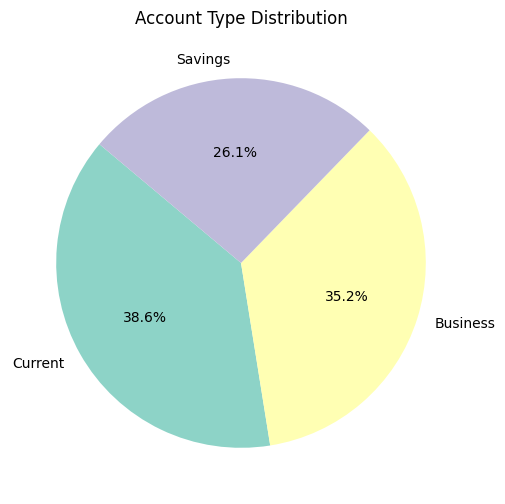

In [9]:
# Calculate proportions of account types
account_counts = data['Account Type'].value_counts()
labels = account_counts.index
sizes = account_counts.values

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Account Type Distribution")
plt.show()


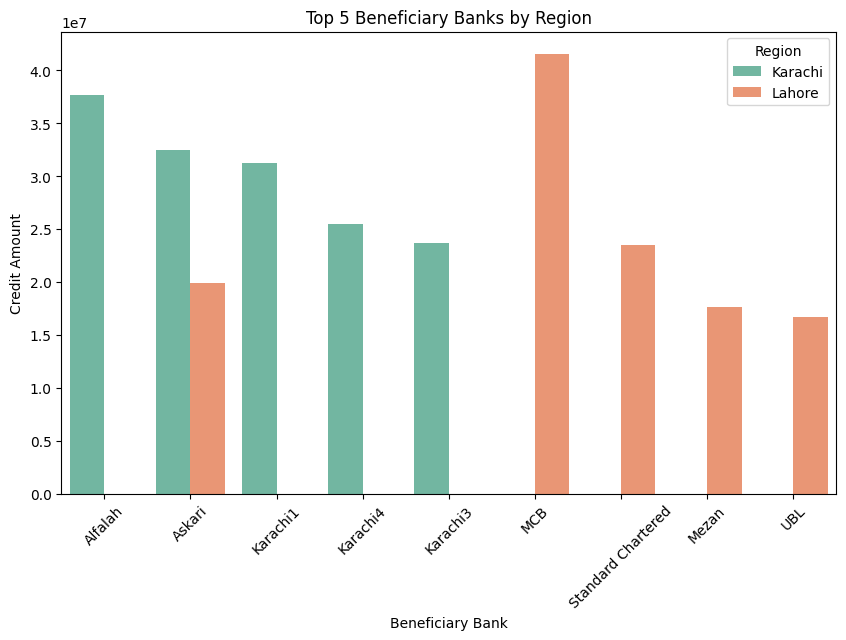

In [28]:
# Bar chart with custom colors for regions
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_beneficiaries, 
    x='Transaction To', 
    y='Credit', 
    hue='Region', 
    palette='Set2' 
)
plt.title("Top 5 Beneficiary Banks by Region")
plt.xlabel("Beneficiary Bank")
plt.ylabel("Credit Amount")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()



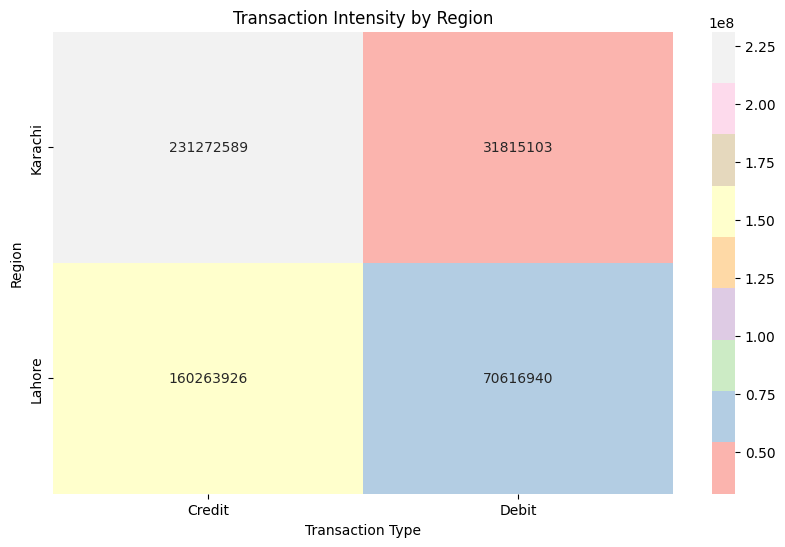

In [22]:
# Create a heatmap with a different colormap
plt.figure(figsize=(10, 6))
sns.heatmap(transaction_intensity.set_index('Region'), annot=True, cmap='Pastel1', fmt='.0f')
plt.title('Transaction Intensity by Region')
plt.xlabel('Transaction Type')
plt.ylabel('Region')
plt.show()



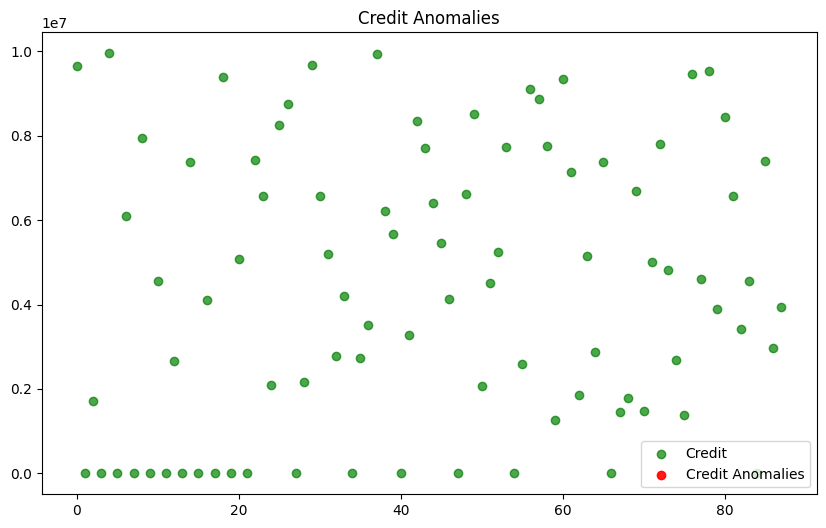

In [14]:
# Identify anomalies using Z-score
from scipy.stats import zscore

data['Credit_Z'] = zscore(data['Credit'])
data['Debit_Z'] = zscore(data['Debit'])

# Filter anomalies
credit_anomalies = data[data['Credit_Z'].abs() > 3]
debit_anomalies = data[data['Debit_Z'].abs() > 3]

# Scatter plot for anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Credit'], label='Credit', color='green', alpha=0.7)
plt.scatter(credit_anomalies.index, credit_anomalies['Credit'], label='Credit Anomalies', color='red', alpha=0.9)
plt.title("Credit Anomalies")
plt.legend()
plt.show()


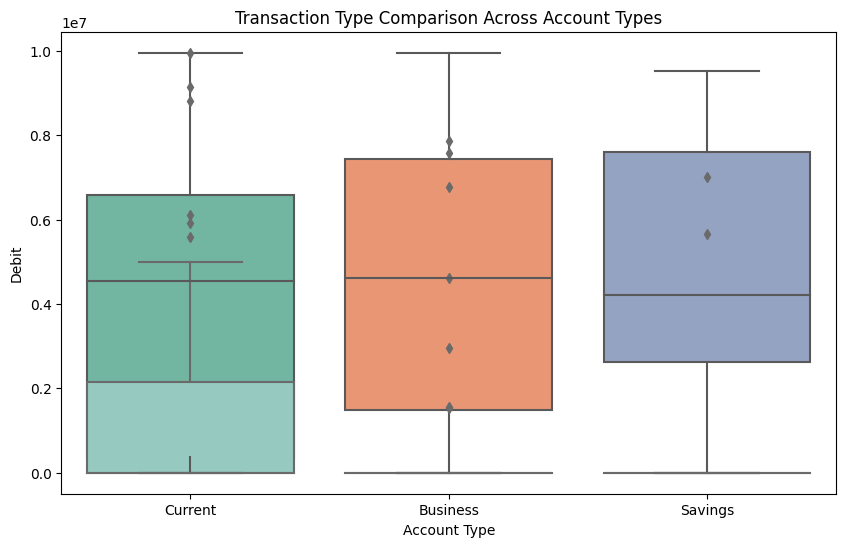

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Account Type', y='Credit', palette="Set2")
sns.boxplot(data=data, x='Account Type', y='Debit', palette="Set3")
plt.title("Transaction Type Comparison Across Account Types")
plt.show()


In [24]:
#Task 6 Time-Based Analysis (if applicable)
if 'Time' in data.columns:
    data['Time'] = pd.to_datetime(data['Time'])  
    data = data.dropna(subset=['Time'])  
    if not data.empty:
        data.set_index('Time', inplace=True)
        #Create a LINE CHART
        time_series = data.resample('D')[['Credit', 'Debit']].sum().reset_index()
        if not time_series.empty:
            plt.figure(figsize=(12, 6))
            plt.plot(time_series['Time'], time_series['Credit'], label='Credit', color='blue')
            plt.plot(time_series['Time'], time_series['Debit'], label='Debit', color='red')
            plt.title("Transaction Trends Over Time")
            plt.xlabel("Time")
            plt.ylabel("Transaction Amount")
            plt.legend()
            plt.show()
        else:
            print("Time series data is empty after processing.")
    else:
        print("No valid time data found in the dataset.")
else:
    print("The 'Time' column is not available in the dataset.")



The 'Time' column is not available in the dataset.


<Figure size 1000x600 with 0 Axes>

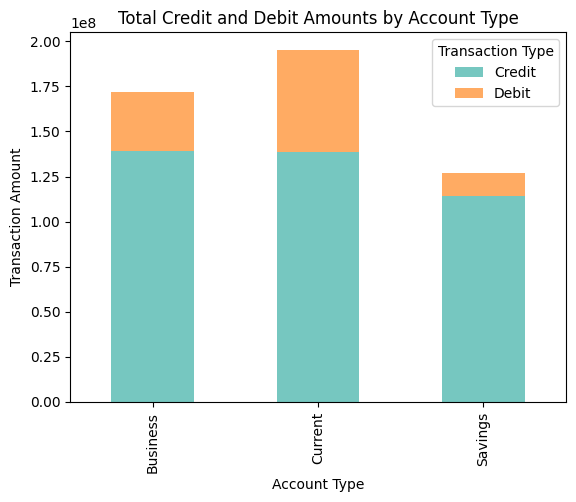

In [27]:
# Stacked bar chart with custom colors
plt.figure(figsize=(10, 6))
customer_transactions.set_index('Account Type').plot(
    kind='bar', 
    stacked=True, 
    color=['#76c7c0', '#ffab63']  # Custom colors (soft turquoise for Credit, peach orange for Debit)
)
plt.title('Total Credit and Debit Amounts by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Type')
plt.show()


<Figure size 1000x600 with 0 Axes>

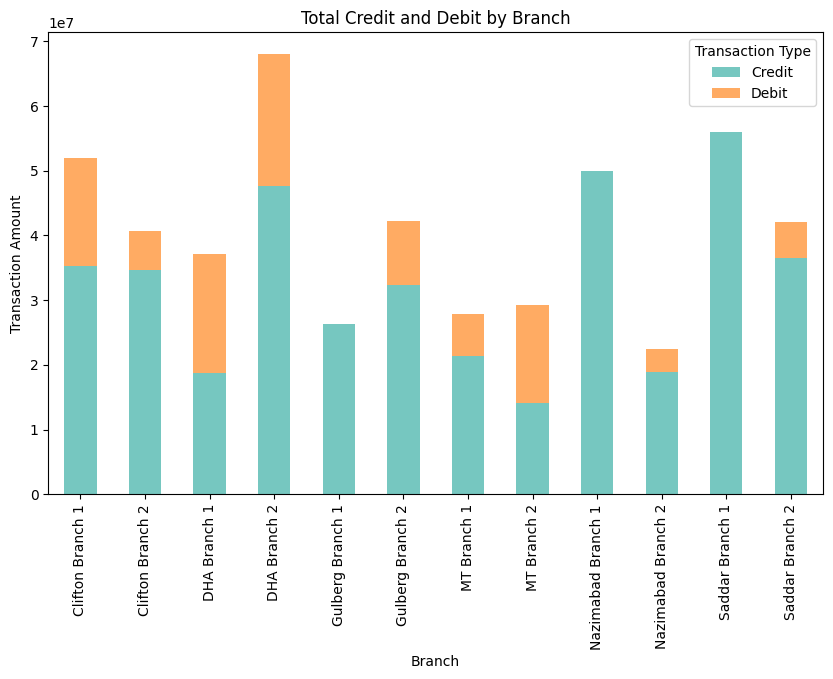

In [30]:
# Aggregate transactions by branch
branch_transactions = data.groupby('Branch')[['Credit', 'Debit']].sum().reset_index()

# Stacked bar chart
plt.figure(figsize=(10, 6))
branch_transactions.set_index('Branch').plot(kind='bar', stacked=True, figsize=(10, 6), color=['#76c7c0', '#ffab63'])
plt.title("Total Credit and Debit by Branch")
plt.xlabel("Branch")
plt.ylabel("Transaction Amount")
plt.legend(title="Transaction Type")
plt.show()


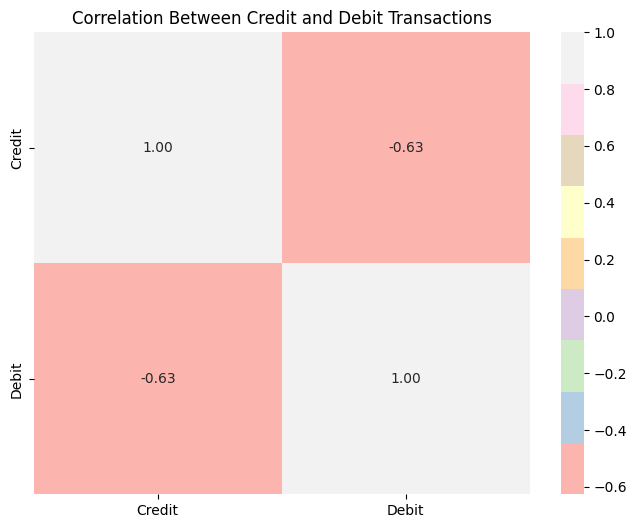

In [33]:
# Correlation matrix heatmap
correlation_matrix = data[['Credit', 'Debit']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt='.2f')
plt.title("Correlation Between Credit and Debit Transactions")
plt.show()


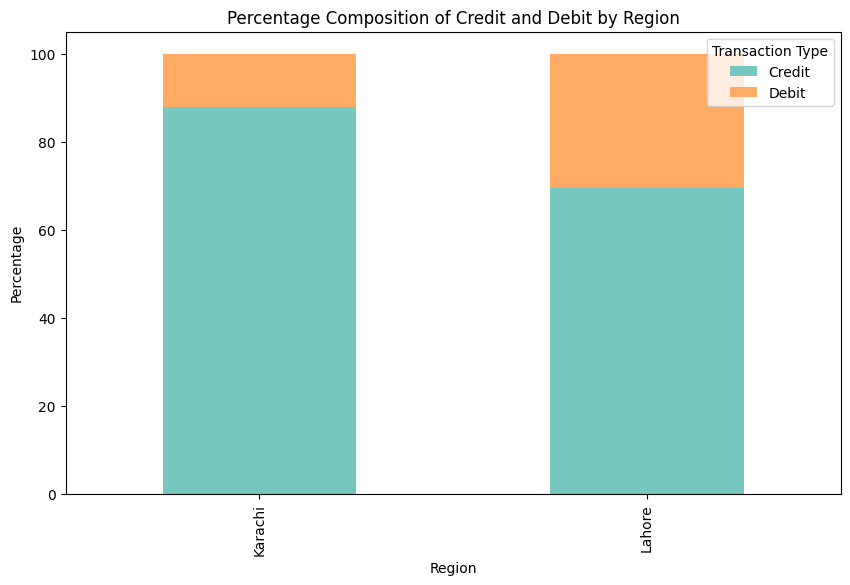

In [35]:
# Calculate proportion of Credit and Debit by region
region_composition = data.groupby('Region')[['Credit', 'Debit']].sum()
region_composition_percentage = region_composition.div(region_composition.sum(axis=1), axis=0) * 100

# Stacked percentage bar chart
region_composition_percentage.plot(
    kind='bar', 
    stacked=True, 
    color=['#76c7c0', '#ffab63'], 
    figsize=(10, 6)
)
plt.title("Percentage Composition of Credit and Debit by Region")
plt.xlabel("Region")
plt.ylabel("Percentage")
plt.legend(title="Transaction Type", loc='upper right')
plt.show()


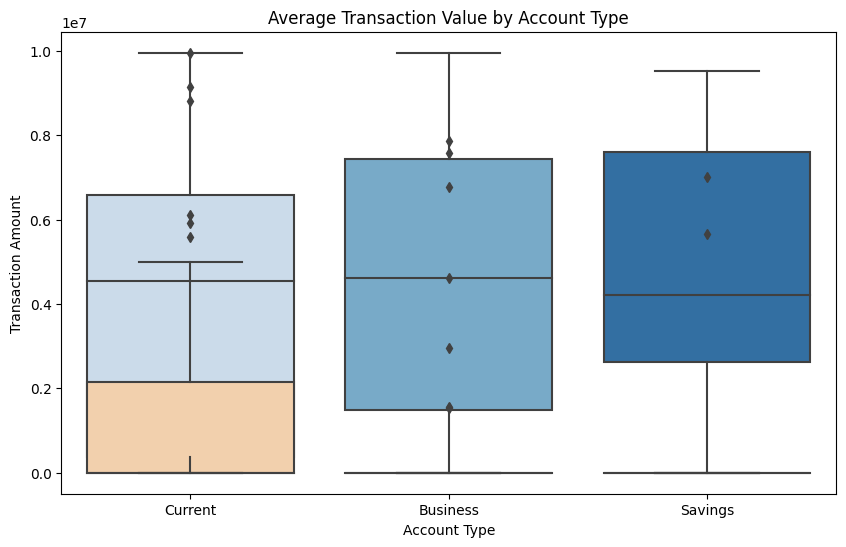

In [36]:
# Box plots for average Credit and Debit by Account Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Account Type', y='Credit', palette='Blues')
sns.boxplot(data=data, x='Account Type', y='Debit', palette='Oranges')
plt.title("Average Transaction Value by Account Type")
plt.xlabel("Account Type")
plt.ylabel("Transaction Amount")
plt.show()
